In [1]:
import sys
import os

# Get absolute path to the 'scripts' folder relative to this notebook
scripts_path = os.path.abspath(os.path.join('..', 'scripts'))

print(f"Adding {scripts_path} to sys.path")
if scripts_path not in sys.path:
    sys.path.insert(0, scripts_path)

# Now import modules from scripts
try:
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper
except ImportError as e:
    print(f"Import error: {e}")
    raise

Adding c:\Users\hp\Desktop\KAIM-week2\fintech-cx-analytics\scripts to sys.path


In [2]:
print("🚀 Starting Scraper...")

try:
    raw_df = run_scraper()
    print("\n✅ Scraping Finished.")
    if raw_df is not None and not raw_df.empty:
        display(raw_df.head())
    else:
        print("⚠️ No data was scraped.")
except Exception as e:
    print(f"❌ Scraper encountered an error: {e}")

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.32275
Total Ratings: 38787
Total Reviews: 8326

BOA: Bank of Abyssinia
App ID: com.boa.boaMobileBanking
Current Rating: 4.2175927
Total Ratings: 6305
Total Reviews: 1214

Dashenbank: Dashenbank
App ID: com.dashen.dashensuperapp
Current Rating: 4.141573
Total Ratings: 3881
Total Reviews: 768

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 500 reviews
Collected 500 reviews for Commercial Bank of Ethiopia


Banks:  32%|███▎      | 1/3 [00:38<01:16, 38.22s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 500 reviews
Collected 500 reviews for Bank of Abyssinia


Banks:  67%|██████▋   | 2/3 [01:24<00:42, 42.85s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 500 reviews
Collected 500 reviews for Dashenbank


Banks: 100%|██████████| 3/3 [01:55<00:00, 38.53s/it]


Scraping Complete!

Total reviews collected: 1500
Reviews per bank:
  Commercial Bank of Ethiopia: 500
  Bank of Abyssinia: 500
  Dashenbank: 500

Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: It is nice app...
Date: 2025-11-26 01:03:18

Rating: ⭐⭐⭐⭐⭐
Review: best...
Date: 2025-11-25 09:27:20

Rating: ⭐⭐⭐⭐⭐
Review: good app...
Date: 2025-11-25 07:10:35

Bank of Abyssinia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: very good...
Date: 2025-11-25 02:15:43

Rating: ⭐
Review: most of the time is not working properly...
Date: 2025-11-24 21:23:20

Rating: ⭐⭐⭐⭐⭐
Review: good service...
Date: 2025-11-24 15:10:24

Dashenbank:
------------------------------------------------------------

Rating: ⭐
Review: What do you care about my phone's settings? Who are you to tell me what to turn off and on? It is my phone after all. This *develo

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,3d88a334-958c-4717-9f97-c5d46359e054,It is nice app,5,2025-11-26 01:03:18,samson getachew,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
1,99d376ea-4824-4af9-a093-27360acc3a5c,best,5,2025-11-25 09:27:20,Nejbadin Ali,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,f1861daf-a1ed-407a-9e7c-295edbb3877d,good app,5,2025-11-25 07:10:35,Amman Mom,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
3,fd178fb7-7026-4d02-98a0-5c86c3bd56f5,it suddenly asked me to enter the verification...,1,2025-11-25 06:14:22,Nuredin Adem,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
4,571c66c6-fd18-437b-b8e5-8c443e9db2df,nice app...,5,2025-11-24 23:24:19,Abdulfeta Mifta,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play


In [4]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
    if df is not None and not df.empty:
        display(df.head())
    else:
        print("⚠️ Warning: Preprocessed dataframe is empty.")
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1500 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1498 (99.87%)
  app_id: 332 (22.13%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-07-31 to 2025-11-26

[4/6] Cleaning text...

[5/6] Filtering out Amharic (non-English) reviews...
Removed 60 reviews containing Amharic characters

[6/6] Validating ratings...
All ratings are valid (1-5)

Preparing final output...
Final dataset: 1440 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1500
Records with missing critical data: 0
Empty reviews removed: 0
Amharic reviews removed: 60
Invalid ratings removed: 0
Final records: 1440

Data retention rate: 96.00%
Data error rate: 4.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Dashenbank: 484
  Bank of Abyssinia: 481
  Commercial Bank of Ethiopia: 475

Rating distribution:
  ⭐️⭐️⭐️⭐️⭐️: 9

,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source
0,7ef21cf6-d226-4370-ab96-01c909dbc58d,very good,5,2025-11-25,2025,11,BOA,Bank of Abyssinia,lij gech,0,9,Google Play
1,896ee9aa-a483-4b1f-b73c-0a26c4b54790,most of the time is not working properly,1,2025-11-24,2025,11,BOA,Bank of Abyssinia,ashenafi endale,0,40,Google Play
2,15c3586b-e672-48db-b3c0-09508375763f,good service,5,2025-11-24,2025,11,BOA,Bank of Abyssinia,Muluberhan Berhane,0,12,Google Play
3,6f7113d8-180e-4f3d-83d9-fbe55f9edd69,not use for me,3,2025-11-23,2025,11,BOA,Bank of Abyssinia,Kemal Mahmud,0,14,Google Play
4,d36fbdcb-b57e-4384-8e5b-ae549e25b33e,It keeps notifying me to disable developer opt...,1,2025-11-22,2025,11,BOA,Bank of Abyssinia,Eyosias Adane,0,138,Google Play


C:\Users\hp\AppData\Local\Temp\ipykernel_12632\4133838295.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_12632\4133838295.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


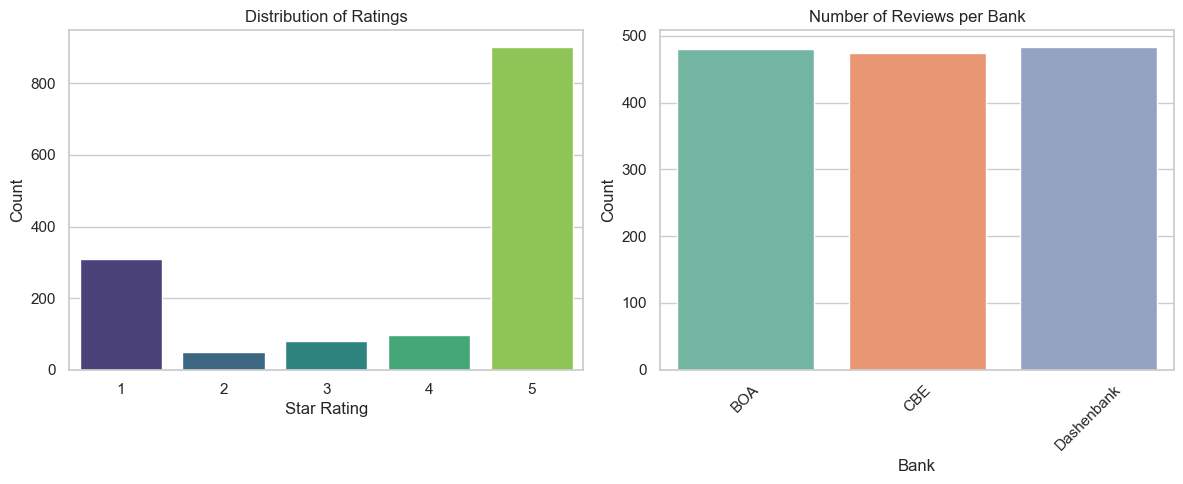

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None and not df.empty:
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 5))

    # Ratings Distribution
    plt.subplot(1, 2, 1)
    sns.countplot(x='rating', data=df, palette='viridis')
    plt.title('Distribution of Ratings')
    plt.xlabel('Star Rating')
    plt.ylabel('Count')

    # Reviews per Bank
    plt.subplot(1, 2, 2)
    sns.countplot(x='bank_code', data=df, palette='Set2')
    plt.title('Number of Reviews per Bank')
    plt.xlabel('Bank')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("No data available to plot.")

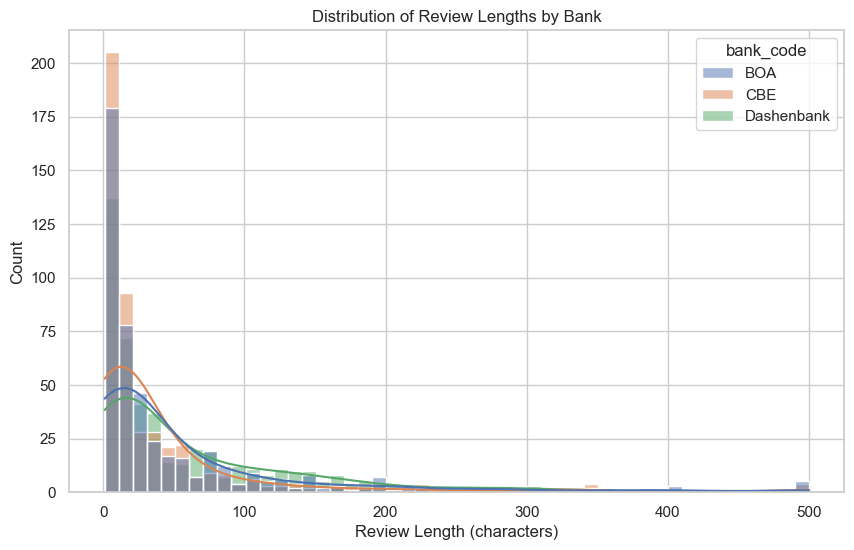

In [7]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()